In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

Exercise 2.*d*

In [12]:
a, b, n = 1, 3, 10
X = np.random.uniform(low=a, high=b, size=n)
X

array([2.37363941, 1.32476475, 2.84415935, 2.58938234, 1.93987623,
       2.7895086 , 2.66564159, 1.83244275, 2.77122451, 1.96282796])

In [13]:
tau = (a+b)/2

In [14]:
#Find MSE of tau_hat
B = 10000
t_boot = np.empty(0)
for _ in range(B):
  sel = np.random.choice(X, size = n, replace=True)
  t_boot = np.append(t_boot, (np.min(sel)+np.max(sel))/2)

tau_hat_mse = np.mean((t_boot - tau)**2)
tau_hat_mse


0.0466817283366363

In [15]:
#Find MSE of tau_tilde
tau_tilde_mse = (1/n) * ((b-a)**2/12)
tau_tilde_mse

0.03333333333333333

Exercise 3.*c*

In [16]:
data = np.array([3.23, -2.50, 1.88, -0.68, 4.43, 0.17,
                1.03, -0.07, -0.01, 0.76, 1.76, 3.18,
                0.33, -0.31, 0.30, -0.61, 1.52, 5.43,
                1.54, 2.28, 0.42, 2.33, -1.03, 4.00,
                0.39])
data

array([ 3.23, -2.5 ,  1.88, -0.68,  4.43,  0.17,  1.03, -0.07, -0.01,
        0.76,  1.76,  3.18,  0.33, -0.31,  0.3 , -0.61,  1.52,  5.43,
        1.54,  2.28,  0.42,  2.33, -1.03,  4.  ,  0.39])

In [17]:
n = len(data)
z_05 = norm.ppf(0.95)
mu_hat = np.mean(data)
sigma_hat = np.std(data)
tau_hat = mu_hat + z_05*sigma_hat
tau_hat

4.180410658803283

In [18]:
#95% mle and parametric bootstrap confidence intervals
z_025 =  norm.ppf(0.975)
se_hat = sigma_hat * np.sqrt((1/n)*(1+(z_05**2)/2))
ci = (tau_hat - z_025*se_hat, tau_hat + z_025*se_hat )
tau_hat, se_hat, ci

(4.180410658803283,
 0.5575801038636548,
 (3.0875737367344174, 5.273247580872149))

In [19]:
B = 10000
t_boot = np.empty(0)
for _ in range(B):
  sel = norm.rvs(mu_hat, sigma_hat, size = n)
  t_boot = np.append(t_boot, np.mean(sel)+z_05*np.std(sel))

se_boot = np.sqrt(np.mean((t_boot-tau_hat)**2))
normal_ci_boot = (tau_hat - se_boot*z_025 , tau_hat + se_boot*z_025)
t_boot, se_boot, normal_ci_boot


(array([3.47865991, 4.68521402, 3.35930233, ..., 3.69489247, 4.14486377,
        3.75642399]),
 0.5645962989253834,
 (3.0738222471049212, 5.286999070501645))

Exercise 7.*d*


In [20]:
n1, n2 = 200, 200
X_1 = 160
X_2 = 148
psi_hat = X_1/n1 - X_2/n2
psi_hat

0.06000000000000005

In [21]:
#90% ci with delta method
z_05 = norm.ppf(.95)
p1_hat = X_1/n1
p2_hat = X_2/n2

se_delta = np.sqrt(p1_hat*(1-p1_hat)/n1 + p2_hat*(1-p2_hat)/n2)
ci = (psi_hat - z_05*se_delta, psi_hat + z_05*se_delta)
se_delta, ci


(0.04197618372363071, (-0.009044678043395274, 0.12904467804339537))

In [22]:
#90% ci with parametric bootstrap
B = 10000
psi_boot = np.empty(0)
for _ in range(B):
  sel_1 = np.random.binomial(n1, p1_hat)
  #print(sel_1)
  sel_2 = np.random.binomial(n2, p2_hat)
  #print(sel_2)
  psi_boot = np.append(psi_boot, sel_1/n1-sel_2/n2)

np.mean(psi_boot)
se_boot = np.std(psi_boot)
ci_boot = (psi_hat - z_05*se_boot, psi_hat + z_05*se_boot)
se_boot, ci_boot

(0.04193216843605874, (-0.008972279337991204, 0.12897227933799132))

Exercise 9

In [23]:
n = 100
mu = 5
X = norm.rvs(loc=5, scale=1, size=n)
mu_mle = np.mean(X)
theta_mle = np.exp(mu_mle)

In [24]:
#Delta method
#se_delta = |g'(mu_hat)|*se(mu_hat)
z=norm.ppf(0.975)
se_delta = (1/np.sqrt(n))*theta_mle
ci_delta = (theta_mle - (1/np.sqrt(n))*z*theta_mle, theta_mle + (1/np.sqrt(n))*z*theta_mle)

In [25]:
ci_delta

(119.54680681857647, 177.83197752692516)

In [26]:
#Parametric Bootstrap
B = 10000
theta_boot = np.empty(0)
for _ in range(B):
  sel = norm.rvs(loc=mu_mle, size=n, scale=1)
  theta_boot = np.append(theta_boot, np.exp(np.mean(sel)))
se_boot = np.std(theta_boot)

ci_normal_boot = (theta_mle - z*se_boot, theta_mle + z*se_boot)



In [27]:
ci_normal_boot

(119.12573956610197, 178.25304477939966)

In [28]:
#Non parametric bootstrap
B = 10000
theta_boot_2 = np.empty(0)
for _ in range(B):
  sel = np.random.choice(X, size=n, replace=True)
  theta_boot_2 = np.append(theta_boot_2, np.exp(np.mean(sel)))
se_boot_2 = np.std(theta_boot_2)

ci_boot = (theta_mle - z*se_boot_2, theta_mle + z*se_boot_2)

In [29]:
ci_boot, se_boot

((120.52664039214594, 176.8521439533557), 15.083773395757868)

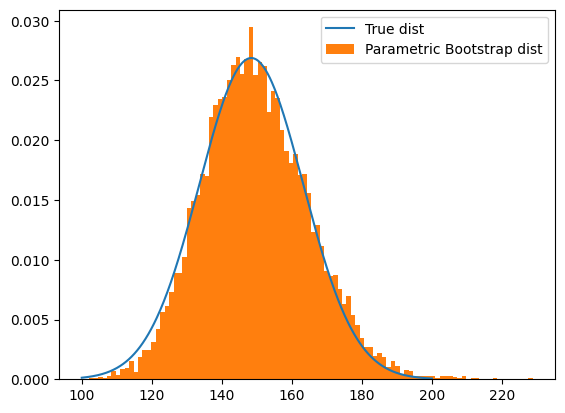

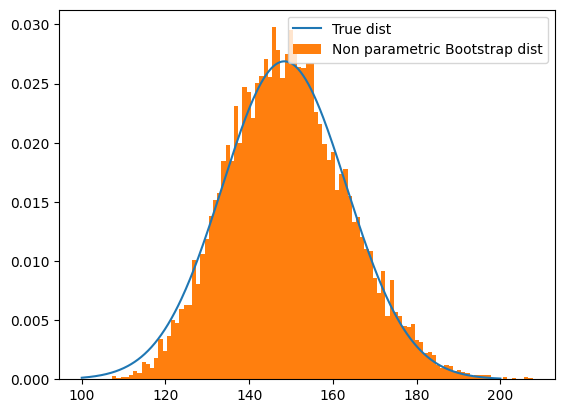

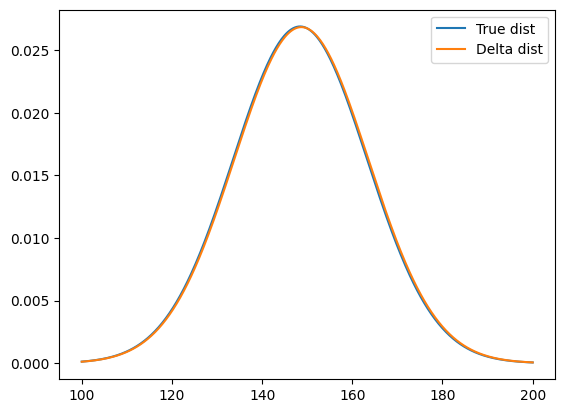

In [30]:
%matplotlib inline
y = np.linspace(100, 200, 500)
def theta_dist(y, mu, var):
	return np.exp(-(y-mu)**2/(2*var))/(var*2*np.pi)**0.5
f_y = theta_dist(y, np.exp(mu), np.exp(2*mu)/n)
f_y_delta = theta_dist(y, theta_mle, se_delta**2 )

plt.plot(y, f_y , label = 'True dist')
plt.hist(theta_boot, 100,density=True, label='Parametric Bootstrap dist')
plt.legend()
plt.show()
plt.plot(y, f_y , label = 'True dist')
plt.hist(theta_boot_2, 100,density=True, label='Non parametric Bootstrap dist')
plt.legend()
plt.show()
plt.plot(y, f_y , label = 'True dist')
plt.plot(y, f_y_delta , label = 'Delta dist')
plt.legend()
plt.show()

In [31]:
#Exercise 10
n = 50
theta = 1
X = np.random.uniform(0, theta, n)
theta_mle = np.max(X)
theta_mle

0.9526162595407152

In [32]:
par_boot = np.empty(0)
B = 10000
for _ in range(B):
  sel = np.random.uniform(0, theta_mle, n)
  par_boot = np.append(par_boot, np.max(sel))
par_se = np.std(par_boot)


In [33]:
npar_boot = np.empty(0)
B = 10000
for _ in range(B):
  sel = np.random.choice(X, size=n, replace=True)
  npar_boot = np.append(npar_boot, np.max(sel))
npar_se = np.std(npar_boot)

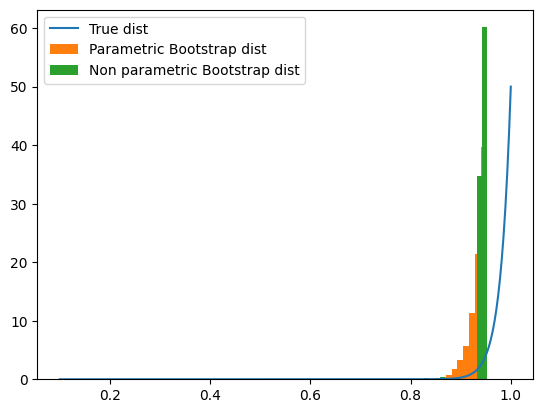

In [34]:
%matplotlib inline
y = np.linspace(0.1, theta, 500)


f_y = (n/theta**n) * y**(n-1)
plt.plot(y, f_y , label = 'True dist')
plt.hist(par_boot, 15,density=True, label='Parametric Bootstrap dist')


plt.hist(npar_boot, 15,density=True, label='Non parametric Bootstrap dist')


plt.legend()
plt.show()